# Interpolation of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(0)

## 1. Generate data points

In [10]:
x_list = np.linspace(-5,5,21)
data0 = np.array([x_list, 15 + 2.4*x_list -0.5*x_list**2 -0.35*x_list**3])
data = np.array([data0[0] + 0.25 * (2*np.random.rand(21)-1), data0[1] + 5.0 * (2*np.random.rand(21)-1)])
print(data)

[[ -5.01684461  -4.6277872   -4.17051521  -3.69481243  -2.92183521
   -2.68090852  -2.15170882  -1.56563741  -0.83950339  -0.70144936
    0.16897245   0.2980492    1.23822973   1.4843256    2.23838054
    2.55242276   3.11963179   3.2695939    3.89140348   4.31009828
    4.8980701 ]
 [ 30.43727719  24.14858179  18.94262995  11.12272496  14.67472119
   12.00976454   8.65389491  11.68873053   8.38940511  14.47821496
   19.29296198  14.21693952  18.2241038   12.61172862  17.16327204
   10.30031093   5.08191362   3.13387935 -10.59892454 -12.92934971
  -34.20304524]]


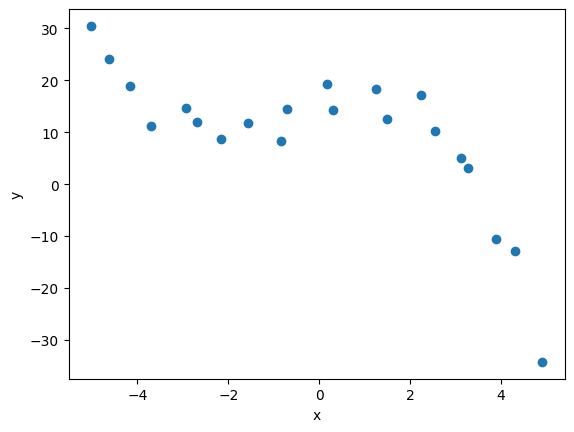

In [12]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0], data[1])

## 2. Fitting a model function

Finding parameters of a model function such that error is minimized.

### 2.1 Define model function

We consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\)

In [5]:
def polynomialModel(x,a):
    return a[0] + a[1]*x + a[2]*x**2 + a[3]*x**3

Let's test our new function 

[-0.58224649 -0.67738096  0.30621665 -0.49341679]


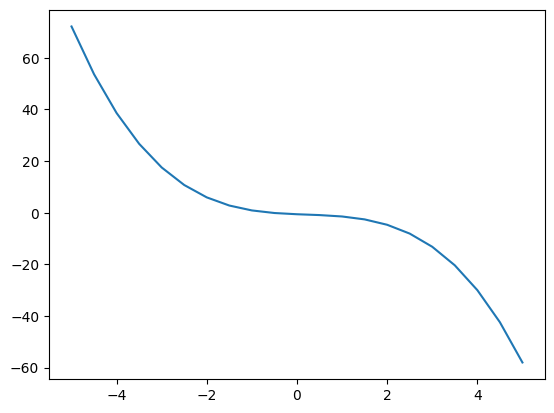

In [9]:
# Starting values for the coefficients
a = 2*np.random.rand(4)-1
print(a)
plt.plot(x_list,polynomialModel(x_list,a))

### 2.2 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) \frac{\partial}{\partial a_k}f(x_i) = 2 \sum_{i=1}^n \left(f(x_i)-y_i\right) x_i^{k}\\)

Remember: \\( \Delta = \sum_{i=1}^n \left(f(x_i)-y_i\right)^2 = \sum_{i=1}^n \left(a_0 + a_1 x_i + a_2 x_i^2 + \dots + a_n x_i^n-y_i\right)^2 \\)

In [16]:
def errorFitGradient(f,coefficients,data):
    return 2 * np.array([np.sum((f(data[0,:],coefficients)-data[1,:])*data[0,:]**k)
               for k in range(4)])

In [17]:
errorFitGradient(polynomialModel,a,data)

array([  -245.64658896,  -2143.91456069,   1117.57135196, -37579.21838429])

### 2.3 Loop for the actual fitting

In [18]:
iterations = 100000
h = 0.00001
for i in range(iterations):
    a = a -h * errorFitGradient(polynomialModel,a,data)

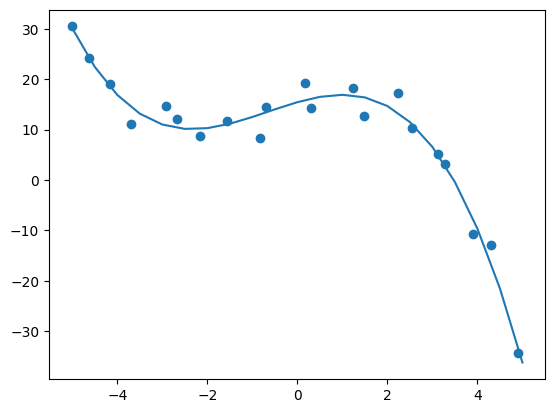

In [20]:
plt.scatter(data[0], data[1])
plt.plot(x_list,polynomialModel(x_list,a))

\\( f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3\\) with parameters:

In [11]:
print(a)

[14.13819122  2.5169182  -0.29951166 -0.34150612]
